In [1]:
# import the first necessary libraries

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read the file and get some info from it

In [55]:
df = pd.read_csv('AdviceRobo_Test_data.csv')
print(df.shape)
df.head()

(30000, 25)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# there are 24 variables in the dataset and 30000 observations

In [6]:
#Do the data need cleaning?
#are there any missing values?

In [ ]:
df.info()

In [7]:
df.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

In [8]:
#The data are clean, there are no missing values!

# Also, in the data there are no categorical data values, therefore no transformation is necessary.

In [9]:
# Our independent variables are the first columns and the last one is our dependent value, the default or not default column.
# Let's call those X and Y 

In [10]:
Y = df['Y']
X = df.iloc[:, 1:24]

In [11]:
#what is the ration between default and non default?

In [12]:
class_names = {0:'Not Default', 1:'Default'}
print(df.Y.value_counts().rename(index = class_names))

Not Default    23364
Default         6636
Name: Y, dtype: int64


In [13]:
# let's plot it

Text(0.5, 1.0, 'Number of Default and Non-Default Cases')

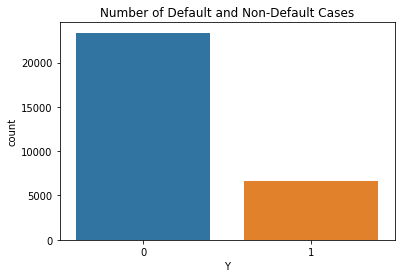

In [14]:
plt.figure()
sns.countplot(df["Y"])
plt.title('Number of Default and Non-Default Cases')
#plt.show()

In [15]:
# Let's see which are the most informative features in the dataset, as those that explain most of the variance:

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k = 23)
X_new = selector.fit_transform(X, Y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])

In [17]:
#Sort the dataframe for better visualization

In [18]:
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

   Feat_names     F_Scores
5          X6  3537.714970
6          X7  2239.169136
7          X8  1757.466444
8          X9  1476.845967
9         X10  1304.591176
10        X11  1085.402485
0          X1   724.068539
17        X18   160.403810
18        X19   103.291524
20        X21    97.188000
19        X20    95.218011
21        X22    91.429801
22        X23    85.089045
1          X2    47.978854
2          X3    23.547112
3          X4    17.781271
11        X12    11.580532
12        X13     6.044238
13        X14     5.944388
4          X5     5.788556
14        X15     3.094745
15        X16     1.371087
16        X17     0.865820


In [19]:
# Clearly the most influencial parameter to detect a client that has more chances to default is the history of past payment.
# X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
#X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;
#X11 = the repayment status in April, 2005. 

In [20]:
# We will test now some supervised machine learning binary classification methods to see which one performs best here 
# The methods that we will test here are the Logistic Regression, the k Nearest Neighbors, the Random Forests and the Support Vector Machine

#First we split the data into a train set and a test set in order to test the train and the test accuracy.
# Will be 80% train data 20% test

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (24000, 23) (24000,)
Test set: (6000, 23) (6000,)


In [22]:
#We need to bring all features to the same level of magnitudes. 

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.5/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [24]:
# All the models will be evauated for their accuracy in order to select the best one
# the Confusion Matrix will be used for the model evaluations

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
# Let's start with the first model, the Logistic Regression algorithm

In [27]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
print (LR)
Y_pred = LR.predict(X_test)
cmlr = confusion_matrix(Y_test, Y_pred)
print ('Classification report Logistic Regression')
print (classification_report(Y_test, Y_pred))

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
Classification report Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      4703
           1       0.76      0.23      0.35      1297

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.79      0.61      0.62      6000
weighted avg       0.81      0.82      0.78      6000



In [28]:
# k Nearest Neighbors algorithm

In [29]:
#We can calculate the accuracy of KNN for different Ks in order to select the one that provides the most accurate results.

In [30]:
from sklearn import metrics
from  sklearn.neighbors import KNeighborsClassifier

Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)   
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])
    
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))

Train set Accuracy:  0.8266666666666667
Test set Accuracy:  0.8086666666666666


In [31]:
# Plot  model accuracy  for Different number of Neighbors 

The best accuracy was with 0.8115 with k= 10


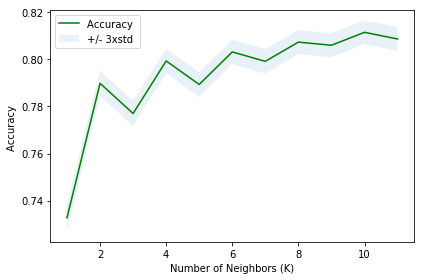

In [33]:
plt.figure()
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
#plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [34]:
# we run the kNN algorithm with k = 8 and print the confusion matrix

In [35]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [36]:
#predict the test set results and check the accuracy with each of our model:

In [37]:
Y_pred = classifier.predict(X_test)

In [38]:
#test the accuracy with a confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix
cmknn = confusion_matrix(Y_test, Y_pred)
print ('Classification report kNN')
print (classification_report(Y_test, Y_pred))

Classification report kNN
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4703
           1       0.62      0.29      0.39      1297

   micro avg       0.81      0.81      0.81      6000
   macro avg       0.72      0.62      0.64      6000
weighted avg       0.78      0.81      0.78      6000



In [40]:
#Random Forest Classification algorithm

In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cmrf = confusion_matrix(Y_test, Y_pred)
print ('Classification report Random Forest')
print (classification_report(Y_test, Y_pred))

Classification report Random Forest
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4703
           1       0.63      0.33      0.44      1297

   micro avg       0.81      0.81      0.81      6000
   macro avg       0.74      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



In [42]:
# Support Vector Machine algorithm

In [43]:
from sklearn import svm
classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cmsvm = confusion_matrix(Y_test, Y_pred)
print ('Classification report Support Vector Machine')
print (classification_report(Y_test, Y_pred))

Classification report Support Vector Machine
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4703
           1       0.70      0.34      0.46      1297

   micro avg       0.83      0.83      0.83      6000
   macro avg       0.77      0.65      0.68      6000
weighted avg       0.81      0.83      0.80      6000



In [54]:
# an inspection of the confusion matrixes gives relatively similar accuracy between the different methods
# The precision is the true positives and negatives and the recall the false positive and negatives -non normalized here. 
# The harmonic average F1 of the precision and recall (normalized) will gives the overall estimation of the accuracy. 

In [45]:
# It seems that the overall best accuracy comes from the Support Vector Machine algorithm.
# Let's plot the CM to discuss it

#Make a function that plots the confusion matrix

In [52]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

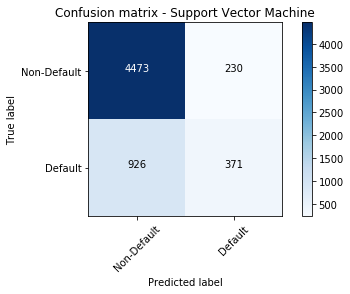

In [53]:
plt.figure()
plot_confusion_matrix(cmknn, classes=['Non-Default','Default'],normalize= False,  title='Confusion matrix - Support Vector Machine')
plt.savefig('cm_SVM.png')